In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
x_train_4d = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test_4d = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
print(x_train_4d.shape)
print(x_test_4d.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
x_train_normalize = x_train_4d / 255
x_test_normalize = x_test_4d / 255
print(x_train_normalize.shape)
print(x_test_normalize.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(60000, 10)
(10000, 10)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(filters = 16,
                 kernel_size = (5, 5),
                 padding = 'same',
                 input_shape = (28, 28, 1),
                 activation = 'relu',
               ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 36,
                 kernel_size = (5, 5),
                 padding = 'same',
#                  input_shape = (28, 28, 1),
                 activation = 'relu',
               ))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [7]:
%%time
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
train_history = model.fit(x = x_train_normalize, y = y_train_onehot, validation_split = 0.2, epochs = 20, batch_size = 300, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 23s - loss: 0.4187 - accuracy: 0.8726 - val_loss: 0.1004 - val_accuracy: 0.9700
Epoch 2/20
 - 22s - loss: 0.1146 - accuracy: 0.9649 - val_loss: 0.0634 - val_accuracy: 0.9812
Epoch 3/20
 - 21s - loss: 0.0800 - accuracy: 0.9758 - val_loss: 0.0513 - val_accuracy: 0.9848
Epoch 4/20
 - 20s - loss: 0.0637 - accuracy: 0.9810 - val_loss: 0.0459 - val_accuracy: 0.9862
Epoch 5/20
 - 20s - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.0401 - val_accuracy: 0.9870
Epoch 6/20
 - 21s - loss: 0.0469 - accuracy: 0.9849 - val_loss: 0.0377 - val_accuracy: 0.9884
Epoch 7/20
 - 20s - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0344 - val_accuracy: 0.9900
Epoch 8/20
 - 21s - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.0329 - val_accuracy: 0.9907
Epoch 9/20
 - 21s - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.0331 - val_accuracy: 0.9891
Epoch 10/20
 - 22s - loss: 0.0300 - accuracy: 0.9910 - val_loss: 0.0333 - val_accuracy: 0.9908
Epoch 11/

In [8]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend([train, validation])
    plt.show()

In [9]:
print(train_history.history)

{'val_loss': [0.10037991777062416, 0.06343993400223553, 0.05128015512600541, 0.04590776527766138, 0.04013977495487779, 0.03772581681841984, 0.03437942283926532, 0.032933154399506746, 0.03314976843539626, 0.033286239369772375, 0.034123929077759386, 0.03438370287185535, 0.033524547348497434, 0.0292300879227696, 0.030335586829460227, 0.03186056450358592, 0.031392663024598734, 0.034310757654020564, 0.030259245669003575, 0.03249996685481164], 'val_accuracy': [0.9700000286102295, 0.981166660785675, 0.9848333597183228, 0.9862499833106995, 0.9869999885559082, 0.9884166717529297, 0.9900000095367432, 0.9906666874885559, 0.9890833497047424, 0.9907500147819519, 0.9900000095367432, 0.9899166822433472, 0.9907500147819519, 0.9917500019073486, 0.9912499785423279, 0.9908333420753479, 0.9918333292007446, 0.9916666746139526, 0.9924166798591614, 0.9916666746139526], 'loss': [0.4187004709616303, 0.11464199691545218, 0.08003726352471859, 0.06369186334777624, 0.05643120486056432, 0.04694034479325637, 0.04303

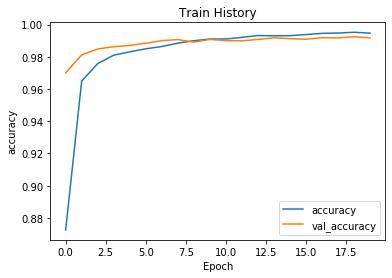

In [10]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

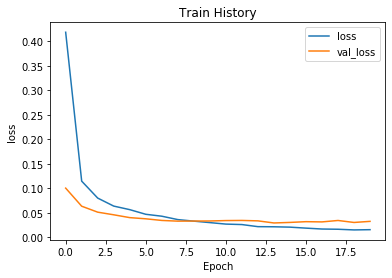

In [11]:
show_train_history(train_history, 'loss', 'val_loss')

In [12]:
scores = model.evaluate(x_test_normalize, y_test_onehot)
print(scores)

10000/10000 [==============================] - 1s 144us/step
[0.02327313497268426, 0.9921000003814697]


In [13]:
import os
if not os.path.exists("model-save"): 
    os.mkdir("model-save")

In [14]:
model.save('model-save/mnist.h5')

In [15]:
def plot_images_labels_prediction(images, labels, prediction, idx, num):
    fig = plt.gcf()
    fig.set_size_inches(15, 20)
    for i in range(0, num):
        ax = plt.subplot(10, 10, 1 + i)
        ax.imshow(images[idx])
        title = 'Label: ' + str(labels[idx])
        if len(prediction) > 0:
            title = title + '\n' + 'Predict: ' + str(prediction[idx])
        if str(labels[idx]) == str(prediction[idx]):
            ax.set_title(title, fontsize = 10) # same
        else:
            ax.set_title(title, fontsize = 15)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

In [16]:
prediction = model.predict_classes(x_test_normalize)

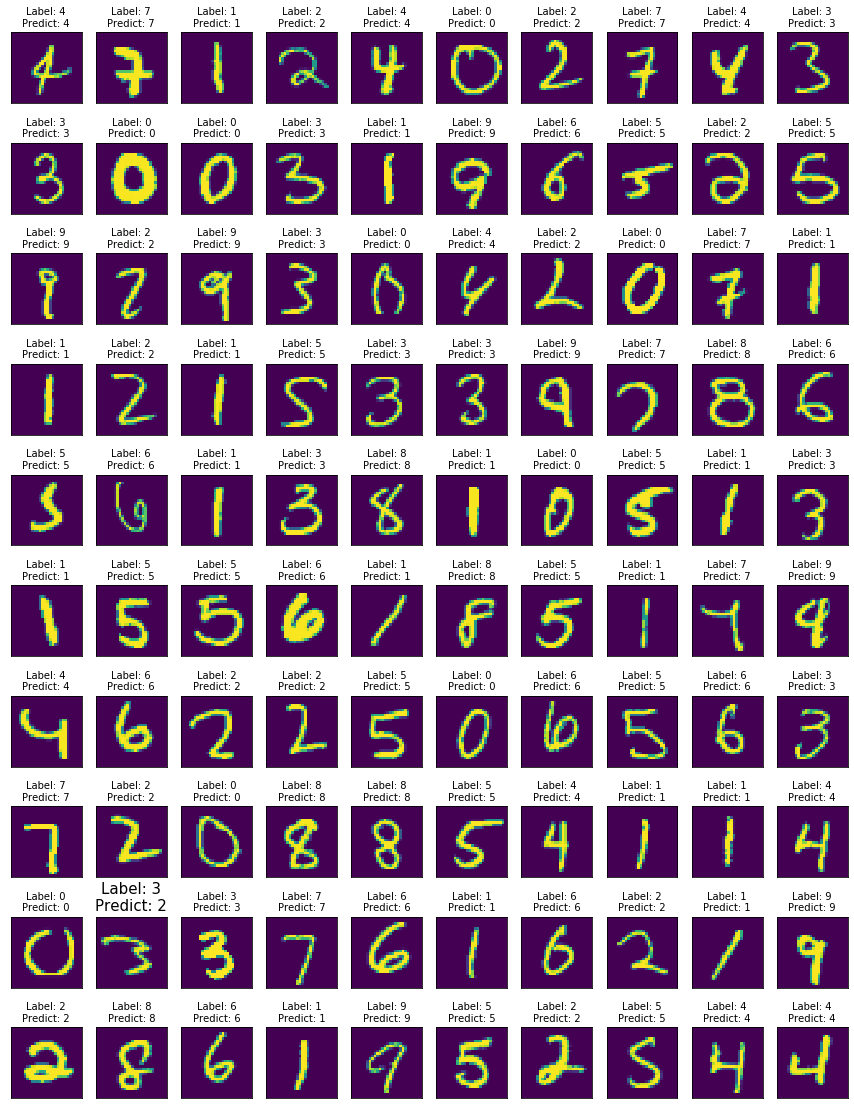

In [17]:
plot_images_labels_prediction(x_test, y_test, prediction, 300, 100)

In [18]:
import cv2

def img_show(img):
    fig = plt.figure() # 建立一個Figure（空的顯示區） 
    print("shape = ",img.shape)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [19]:
def img_resize(img):
    return cv2.resize(img, (28, 28))

In [20]:
def img_normalize(img):
    return img / 255

In [84]:
def test_model(img):
#     img_show(img)
    digit = img_normalize(img_resize(img))
    img_show(digit)
    
    digit = digit.reshape(1, 28, 28, 1).astype('float32')
    pred = model.predict_classes(digit)
    
    print(pred)

shape =  (28, 28)


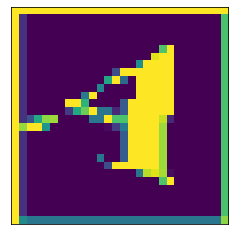

[2]
shape =  (28, 28)


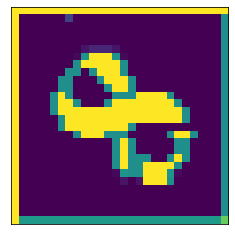

[8]
shape =  (28, 28)


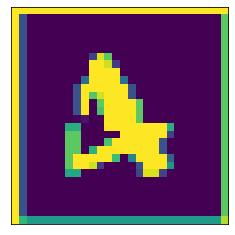

[2]
shape =  (28, 28)


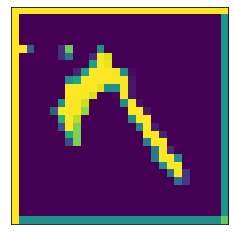

[9]
shape =  (28, 28)


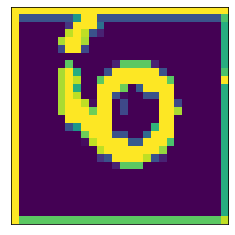

[6]


In [86]:
for i in range(5):
    img = cv2.imread('./result-save/'+str(i)+'.png', 0) #讀進來灰階
    # img_show(img)
    img = 255 - img
    # img_show(img)

    test_model(img)